In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

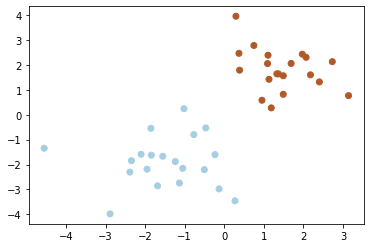

In [2]:
# Linearly separable data in 2d

# Generate data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Paired)

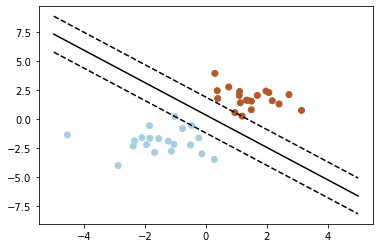

In [4]:
# Fit SVM
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')

# Plot margins
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Paired)

In [5]:
# Magnitude of w
np.linalg.norm(w)

1.111010607589106

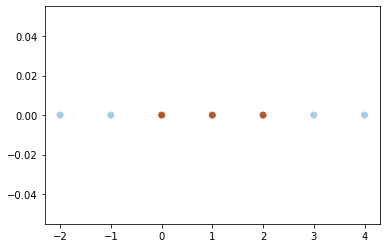

In [3]:
# Now some other boundary with different margin



In [4]:
def phi(x):
    return np.hstack([1.414*x, x**2])

In [5]:
phi(X)

array([[-2.828,  4.   ],
       [-1.414,  1.   ],
       [ 0.   ,  0.   ],
       [ 1.414,  1.   ],
       [ 2.828,  4.   ],
       [ 4.242,  9.   ],
       [ 5.656, 16.   ]])

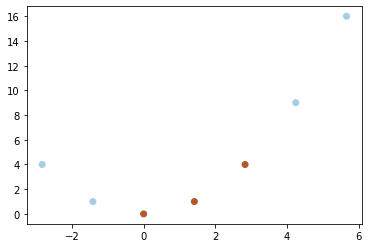

In [6]:
plt.scatter(phi(X)[:, 0], phi(X)[:, 1], c = y,cmap = cm.Paired)

In [7]:
from sklearn.svm import SVC

In [8]:
c = SVC(C=1, kernel='linear')

In [9]:
c.fit(phi(X), y)

SVC(C=1, kernel='linear')

Text(0.5, 1.0, 'Decision surface: 0.9*x_1 + -0.7*x_2 + 1.0 = 0')

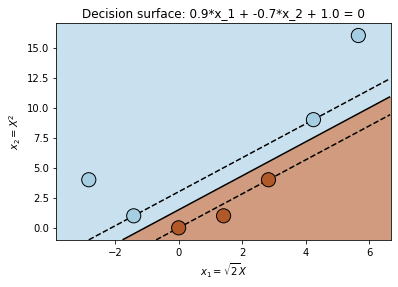

In [10]:
plt.scatter(phi(X)[:, 0], phi(X)[:, 1], c = y, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=200)
x_min = phi(X)[:, 0].min()-1
x_max = phi(X)[:, 0].max()+1
y_min = phi(X)[:, 1].min()-1
y_max = phi(X)[:, 1].max()+1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = c.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.xlabel(r"$x_1 = \sqrt{2}X$")
plt.ylabel(r"$x_2 = X^2$")
plt.title(r"Decision surface: {:0.1f}*x_1 + {:0.1f}*x_2 + {:0.1f} = 0".format(c.coef_[0, 0], c.coef_[0, 1], c.intercept_[0]))